In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
%matplotlib inline

In [3]:
#!type resale_Lincoln_MKS.csv

In [4]:
# load dataset
df_Tacoma = pd.read_csv('resale_Toyota_Tacoma.csv')
df_Tacoma.head()

,brand,config,drivetrain,exterior_color,interior_color,mileage,model,price,transmission,year
0,Toyata,TRD Off Road,4x4/4-wheel drive,Beige,Black,53703,Tacoma,29550.0,Automatic,2016
1,Toyata,TRD Sport,4x4/4-wheel drive,Blue,Gray,30018,Tacoma,NaN,Automatic,2016
2,Toyata,SR5,4x4/4-wheel drive,Black,Gray,10053,Tacoma,29991.0,Automatic,2019
3,Toyata,TRD Pro,4x4/4-wheel drive,Blue,Black,5664,Tacoma,44500.0,Automatic,2018
4,Toyata,5 FT,4x4/4-wheel drive,Silver,Gray,35258,Tacoma,NaN,Automatic,2015


In [5]:
## clean the dataset
# drop rows that have NaN
df_Tacoma = df_Tacoma.dropna(axis=0, how='any')

config
SR5             1098
Base             682
TRD Sport        680
TRD Off Road     551
SR               348
PreRunner        322
Limited          167
Double Cab       124
TRD Pro           90
Access Cab        69
dtype: int64


Text(0.5, 1.0, 'Toyota Tacoma-Configuration Plot')

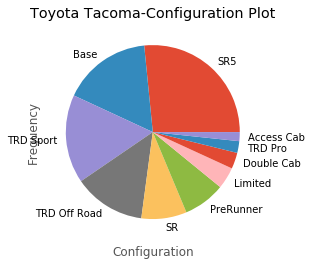

In [6]:
## Explore the dataset: Take care of the config: only care about Base and EcoBoost
df_Tacoma = df_Tacoma[df_Tacoma['config'].isin(['SR5', 'Base', 'TRD Sport', 'TRD Off Road', 'SR', 'PreRunner', 'Limited', 'Double Cab', 'TRD Pro', 'Access Cab']) ]
group_config = df_Tacoma.groupby('config')
print(group_config.size().sort_values(ascending = False))
df_Tacoma['config'].value_counts().plot(kind='pie')
plt.xlabel('Configuration')
plt.ylabel('Frequency')
plt.title('Toyota Tacoma-Configuration Plot')

exterior_color
White     977
Gray      852
Silver    726
Black     580
Red       489
Blue      231
Beige     140
Other      51
dtype: int64


Text(0.5, 1.0, 'Toyota Tacoma-Exterior Color')

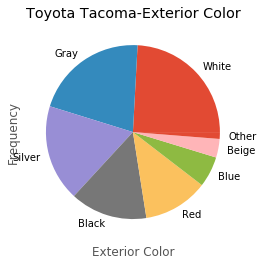

In [7]:
## Explore the dataset: Take care of the exterior_color: ['Black', 'White', 'Brown', 'Silver', 'Red', 'Gray', 'Beige', 'Other', 'Blue']
df_Tacoma = df_Tacoma[df_Tacoma['exterior_color'].isin(['White', 'Gray', 'Silver', 'Black', 'Red', 'Blue', 'Beige', 'Other'])]
group_ext_color = df_Tacoma.groupby('exterior_color')
print(group_ext_color.size().sort_values(ascending = False))
df_Tacoma['exterior_color'].value_counts().plot(kind='pie')
plt.xlabel('Exterior Color')
plt.ylabel('Frequency')
plt.title('Toyota Tacoma-Exterior Color')

interior_color
Gray      2596
Black      705
Other      544
Orange      75
Brown       65
Beige       55
dtype: int64


Text(0.5, 1.0, 'Toyota Tacoma-Interior Color')

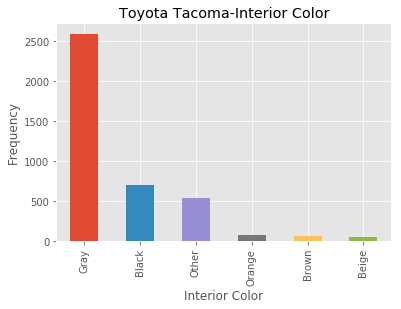

In [8]:
## Explore the dataset: Take care of the interior_color: []
df_Tacoma = df_Tacoma[df_Tacoma['interior_color'].isin(['Gray', 'Black', 'Other', 'Orange', 'Brown', 'Beige'])]
group_int_color = df_Tacoma.groupby('interior_color')
print(group_int_color.size().sort_values(ascending = False))
df_Tacoma['interior_color'].value_counts().plot(kind='bar')
plt.xlabel('Interior Color')
plt.ylabel('Frequency')
plt.title('Toyota Tacoma-Interior Color')

drivetrain
4x4/4-wheel drive    2346
RWD                  1646
dtype: int64


Text(0.5, 1.0, 'Toyota Tacoma-Drivetrain')

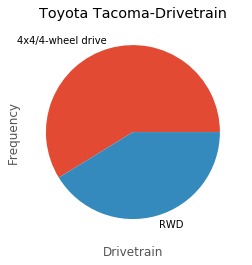

In [9]:
## Explore the dataset: Take care of the drivetrain:
df_Tacoma = df_Tacoma[df_Tacoma['drivetrain'].isin(['4x4/4-wheel drive', 'RWD'])]
group_dt = df_Tacoma.groupby('drivetrain')
print(group_dt.size().sort_values(ascending = False))
df_Tacoma['drivetrain'].value_counts().plot(kind='pie')
plt.xlabel('Drivetrain')
plt.ylabel('Frequency')
plt.title('Toyota Tacoma-Drivetrain')

year
2017    1080
2018     751
2016     733
2019     396
2015     294
2013     237
2014     156
2012      89
2011      77
2010      51
2009      42
2008      28
2007      22
2006      16
2005      13
2004       3
2003       2
2002       1
2001       1
dtype: int64


Text(0.5, 1.0, 'Toyota Tacoma-Year')

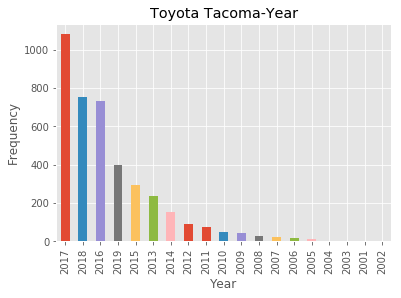

In [10]:
## Explore the dataset: Take care of the year:
group_yr = df_Tacoma.groupby('year')
print(group_yr.size().sort_values(ascending = False))
df_Tacoma['year'].value_counts().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Toyota Tacoma-Year')

Text(0.5, 1.0, 'Toyota Tacoma-Price vs Mileage')

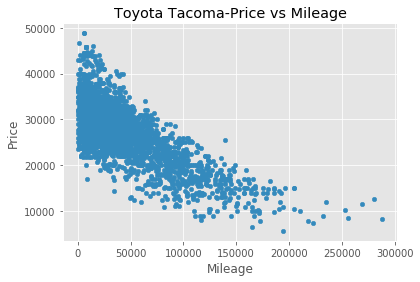

In [11]:
# scatter(x='Mileage', y='Price')
df_Tacoma.plot(kind='scatter',x='mileage', y='price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Toyota Tacoma-Price vs Mileage')

Text(0.5, 1.0, 'Toyota Tacoma-Price vs Year')

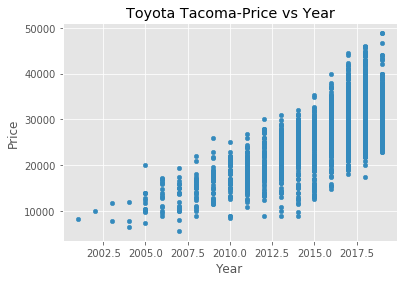

In [12]:
# scatter(x='Year', y='Price')
df_Tacoma.plot(kind='scatter',x='year', y='price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Toyota Tacoma-Price vs Year')

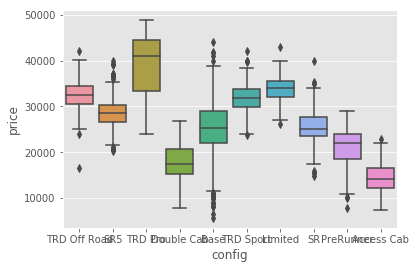

In [13]:
import seaborn as sns
# boxplot of price by config
sns.boxplot(x='config', y='price', data=df_Tacoma)

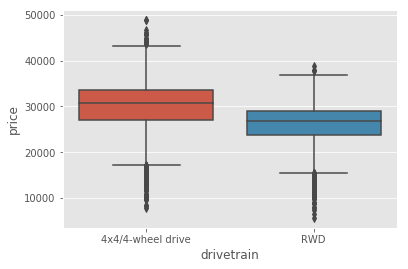

In [14]:
# boxplot of price by drivetrain
sns.boxplot(x='drivetrain', y='price', data=df_Tacoma)

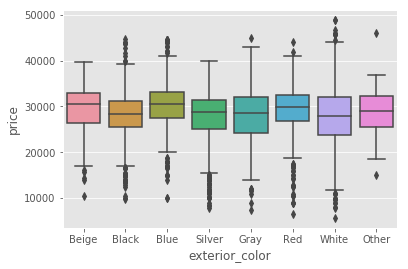

In [15]:
# boxplot of price by color
sns.boxplot(x='exterior_color', y='price', data=df_Tacoma)

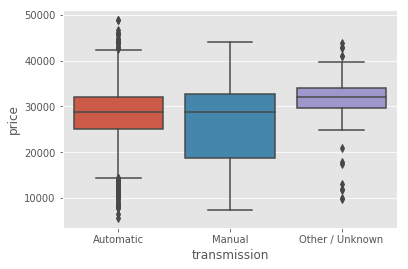

In [16]:
# boxplot of price by transmission
sns.boxplot(x='transmission', y='price', data=df_Tacoma)

In [17]:
## Models 
# Linear Regression on Price vs Year
from sklearn.linear_model import LinearRegression
X = df_Tacoma['year'].values.reshape(-1, 1)
y = df_Tacoma['price'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
print(reg.coef_)
print(reg.intercept_)
price_2019 = reg.predict(np.array([2019]).reshape(-1, 1))
price_2016 = reg.predict(np.array([2016]).reshape(-1, 1))
price_2014 = reg.predict(np.array([2014]).reshape(-1, 1))
print(price_2016/price_2019)
print(price_2014/price_2019)

[[1664.67823042]]
[-3327988.15915091]
[[0.84865272]]
[[0.74775453]]


In [18]:
# Linear Regression on Price vs Mileage
from sklearn.linear_model import LinearRegression
X = df_Tacoma['mileage'].values.reshape(-1, 1)
y = df_Tacoma['price'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
print(reg.coef_)
print(reg.intercept_)
price_0 = reg.predict(np.array([0]).reshape(-1, 1))
price_45k = reg.predict(np.array([45000]).reshape(-1, 1))
price_75k = reg.predict(np.array([75000]).reshape(-1, 1))
print(price_45k/price_0)
print(price_75k/price_0)

[[-0.12343434]]
[32853.42430777]
[[0.83092949]]
[[0.71821581]]


In [19]:
# PCA
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

#df_Tacoma.corr()
#Get rid of 'model', 'brand', 'interior_color', 'transmission'
df_Tacoma = df_Tacoma.drop(['model'], axis= 1)
df_Tacoma = df_Tacoma.drop(['brand'], axis= 1)
df_Tacoma = df_Tacoma.drop(['interior_color'], axis= 1)
df_Tacoma = df_Tacoma.drop(['transmission'], axis= 1)
df_Tacoma.head()

,config,drivetrain,exterior_color,mileage,price,year
0,TRD Off Road,4x4/4-wheel drive,Beige,53703,29550.0,2016
2,SR5,4x4/4-wheel drive,Black,10053,29991.0,2019
3,TRD Pro,4x4/4-wheel drive,Blue,5664,44500.0,2018
5,SR5,RWD,Silver,7155,28500.0,2016
9,Double Cab,4x4/4-wheel drive,Blue,95956,20790.0,2011


In [20]:
#Encoding data
labelDict = {}
for feature in df_Tacoma:
    le = preprocessing.LabelEncoder()
    le.fit(df_Tacoma[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    df_Tacoma[feature] = le.transform(df_Tacoma[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue   

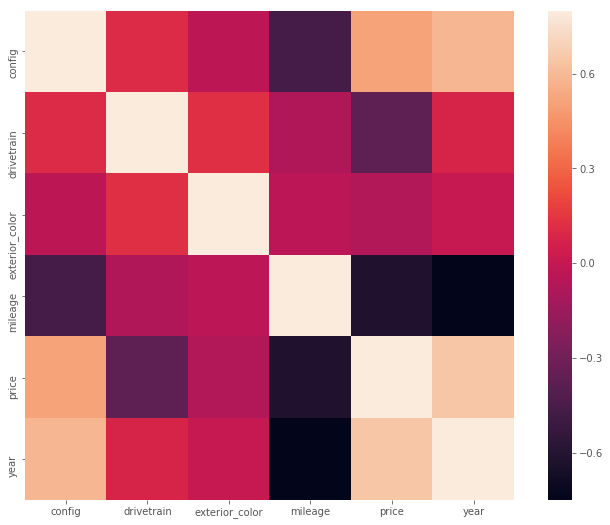

In [21]:
#correlation matrix
corrmat = df_Tacoma.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()